In [53]:
# Dependencies and Setup
# Dependencies and Setup

#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
#import warnings
#warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load
clinical_trial_data_to_load

MD_Data = pd.read_csv(mouse_drug_data_to_load)
CT_Data = pd.read_csv(clinical_trial_data_to_load)

# Quick reviewe and count before join
#MD_Data
#CT_Data
#MD_Data.count()
CT_Data.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [54]:
# Combine the data into a single dataset
MDCT_Join = pd.merge(MD_Data, CT_Data, on="Mouse ID", how="left")
# Display the data table for preview
MDCT_Join.tail(4)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1
1905,j235,Placebo,20,52.942902,1


In [55]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
MDCT_GRP_DT = MDCT_Join.groupby(["Drug", "Timepoint"])
MDCT_MV = MDCT_GRP_DT["Tumor Volume (mm3)"].mean()
MDCT_MV_df = pd.DataFrame(MDCT_MV)
MDCT_MV_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [56]:
#Enclosing in a Dataframe
MDCT_MeanVolume_df= MDCT_MV_df 
MDCT_MeanVolume_df

#Reset index for alignment 
MDCT_MeanVolume_df  = MDCT_MV_df .reset_index()
MDCT_MeanVolume_df.head(2)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


## Tumor Response to Treatment

In [57]:
#Building on the steps above
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
MDCT_SE = MDCT_GRP_DT["Tumor Volume (mm3)"].sem()
#Convert to DataFrame - Standard Error Mean
MDCT_SE_df = pd.DataFrame(MDCT_SE)
#Reset index for alignment 
MDCT_SE_df= MDCT_SE_df.reset_index()
# Preview DataFrame
MDCT_SE_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [58]:
# Minor Data Munging to Re-Format the Data Frames -  Mean Volume
ReFormat_MV_Drug = pd.pivot_table(MDCT_MeanVolume_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = ['Drug'])
ReFormat_MV_Drug.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


In [60]:
# Minor Data Munging to Re-Format the Data Frames -  Standard Erro Mean
ReFormat_SEM_Drug = pd.pivot_table(MDCT_SE_df, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug')
ReFormat_SEM_Drug.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [61]:
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

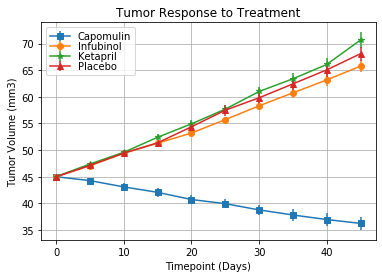

In [62]:
# Generate the Plot (with Error Bars)
fig, ax2=plt.subplots()
MVD=ReFormat_MV_Drug
MSP = ReFormat_SEM_Drug
MVD_timepoint=MVD.index

plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

#Define Variable for 5 drug lapbes and maker
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']
markers = ['s','o','*','^']
x=0
y=0
for drug in drug_list:
    ax2.errorbar(MVD_timepoint,
                 MVD[drug],
                 yerr=MSP[drug], marker = markers[y],
                 label=drug_list[x])
    x+=1
    y+=1
    
plt.legend(loc = 'best', labelspacing=0.0)

# Save the Figure
plt.savefig("Drug_Treatment")

## Survival Rates

In [63]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Using the #MDCT_GRP_DT = MDCT_Join.groupby(["Drug", "Timepoint"])
MDCT_Mouse_Count = MDCT_GRP_DT["Mouse ID"].count()
# Convert to DataFrame
Mouse_Count_df = pd.DataFrame(MDCT_Mouse_Count)
#Reset Index
Mouse_Count_df = Mouse_Count_df.reset_index()
# Preview DataFrame
Mouse_Count_df.head(5)

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [64]:
# Minor Data Munging to Re-Format the Data Frames
ReFormat_Mouse_Count_Drug = pd.pivot_table(Mouse_Count_df, values = 'Mouse ID', index=['Timepoint'], columns = ['Drug'])
ReFormat_Mouse_Count_Drug
# Preview the Data Frame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


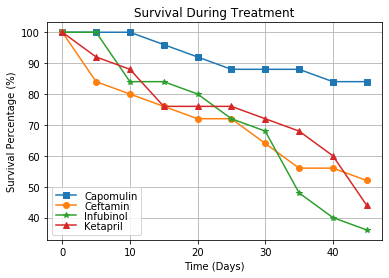

In [65]:
# Generate the Plot (Accounting for percentages)
fig, ax3 = plt.subplots()
#calculate percentage
perc = (ReFormat_Mouse_Count_Drug /25)* 100
mc_plot = perc
mc_timepoint= mc_plot.index

#Print Legends
plt.grid()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Percentage (%)")
plt.title('Survival During Treatment')

drug_list = ['Capomulin', 'Ceftamin', 'Infubinol','Ketapril']
markers = ['s','o','*','^']
x=0
y=0
for drug in drug_list:
    ax3.errorbar(mc_timepoint,
                 mc_plot[drug],
                 marker = markers[y],
                 label=drug_list[x])
    x+=1
    y+=1
plt.legend(loc = 'best', labelspacing=0.0)

# Save the Figure
plt.savefig("Survival_During_Treatment")
# Show the Figure
plt.show()

## Summary Bar Graph

In [66]:
# Calculate the percent changes for each drug

full_drug_list = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

b=0
for drug in full_drug_list:
   PercentChgPerDrug= ReFormat_MV_Drug.pct_change(fill_method = 'ffill').sum()*100
b+=1

# Display the data to confirm
PercentChgPerDrug

Drug
Capomulin   -21.391539
Ceftamin     36.141889
Infubinol    38.746192
Ketapril     46.308083
Naftisol     44.193800
Placebo      42.393592
Propriva     39.543684
Ramicane    -24.865579
Stelasyn     42.945527
Zoniferol    39.068045
dtype: float64

C:\Users\tayoade\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


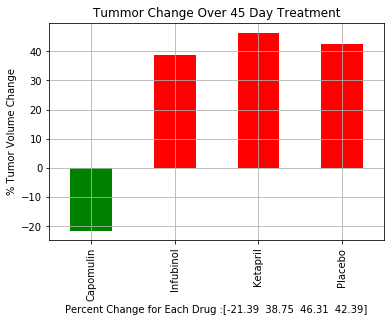

In [67]:
# Store all Relevant Percent Changes into a Tuple

rel_pct_changes = PercentChgPerDrug[['Capomulin', 'Infubinol', 'Ketapril','Placebo']]

# Splice the data between passing and failing drugs
pct_changes_pos = rel_pct_changes[rel_pct_changes>0]
pct_changes_neg = rel_pct_changes[rel_pct_changes<0]

# Orient widths. Add labels, tick marks, etc. 
fig, ax4 = plt.subplots()

graphing= rel_pct_changes.plot(kind="bar", x=(pct_changes_neg,pct_changes_pos),
                           grid=True, figsize=(6,4),
                           title="Tummor Change Over 45 Day Treatment",
                           color =['g','r','r','r'],
                              ax=ax4)

#adding 'myarray' in x label to make percent change more visable
myarray = np.asarray(round(rel_pct_changes,2))
plt.xlabel('Percent Change for Each Drug :'+ str(myarray))
plt.ylabel("% Tumor Volume Change")


plt.savefig("Treatment_Over_45Days")
# Show the Figure
fig.show()